In [10]:
# Please make sure to install the dependencies
from functools import reduce
from statistics import mean, stdev, mode, quantiles
import matplotlib.pyplot as plt
from decimal import Decimal
import re
import pandas as pd
from os import walk
import numpy as np


plt.style.use(['science','ieee'])



In [11]:
# /usr/bin/env TS_NODE_PROJECT=tsconfig.json 'OFF-HFC_LOGGING={"debug":"console","info":"console"}' 'NODE_OPTIONS=--require /home/rafaelapb/.vscode-server-insiders/bin/4589815e4849499c67125ff68563fa102646b869/extensions/ms-vscode.js-debug/src/bootloader.bundle.js --inspect-publish-uid=http' 'VSCODE_INSPECTOR_OPTIONS={"inspectorIpc":"/tmp/node-cdp.33739-1.sock","deferredMode":false,"waitForDebugger":"","execPath":"/home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node","onlyEntrypoint":false,"autoAttachMode":"always","mandatePortTracking":true,"fileCallback":"/tmp/node-debug-callback-10ce8a101bff4e7a"}' /home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node --require ts-node/register --async-stack-traces packages/cactus-plugin-cc-tx-visualization/src/test/typescript/integration/cctxviz-persist-cross-chain-log.test.ts > packages/cactus-plugin-cc-tx-visualization/src/test/typescript/csv/out.txt
path = os.getcwd()
parent = os.path.dirname(path)
print(parent)
test_result_path = parent + "/test-results/"
NUMBER_TESTS = 30

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(test_result_path)



#(.)*-dummy-\d+.out captures:
# cctxviz-generate-use-case-dummy-1.out and cctxviz-generate-use-case-dummy-58.out

#(.)*-dummy-\d+-events-\d+.out captures
#cctxviz-generate-use-case-dummy-60-events-1.out and cctxviz-generate-use-case-dummy-60-events-97.out
def get_all_files(path,regex):
    filenames = []
    for _, _, filenames in sorted(walk(path)):
        break
    #regex all out: .*\.out
    # for dummy use case: (.)*-dummy-\d.out
    filenames = [i for i in filenames if re.match(regex, i)]
    return filenames

def exists (element):
    if (element):
        return True
    else:
        return False


/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main
['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"c116ee82-6428-440e-b0e5-0d3825888abf"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-1667dDonpnV3tkOT.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/test-results/


In [12]:
mapper = {
    # - Initialize Infrastructure (RabbitMQ server, RabbitMQ client, Test ledgers, Connectors), + init cctxviz on test file
    'EVAL-testFile-SETUP-INFRA': 'Infrastructure Setup',
    'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': 'Setting up RabbitMQ',
    'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': 'Initialize Hephaestus',
    # send a rabbit mq message or call a modified connector
    'EVAL-testFile-SEND-MESSAGES': 'Emit Local Transactions',

    # capture rabbit mq messages; can be subdivided see next 2 entries
    'EVAL-testFile-POLL': 'Poll Transaction Receipts',

    # issue tx and send to rabbit mq - fabric/besu
    'EVAL-PluginLedgerConnectorFabric-ISSUE-TRANSACTION': 'Fabric Transaction (modified)',
    'EVAL-PluginLedgerConnectorBesu-ISSUE-TRANSACTION': 'Besu Receipt (modified)',
    
    # transform raw receipt into fabric/besu receipt
    'EVAL-PluginLedgerConnectorFabric-GENERATE-AND-CAPTURE-RECEIPT': 'Create Fabric Receipt',
    'EVAL-PluginLedgerConnectorBesu-GENERATE-AND-CAPTURE-RECEIPT': 'Create Besu Receipt',

    # runs txReceiptToCrossChainEventLogEntry
    'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': 'Create CC Event',

    # runs aggregateCcTx
    'EVAL-testFile-AGGREGATE-CCTX': "Create CC-Tx",

    'EVAL-ccModel-DUMMY': "Create CC-Model",

    'EVAL-plugin-cc-tx-visualization-PERSIST-LOG': 'Persist CC Events',
}

In [13]:
### 6 EVENTS


files = get_all_files(test_result_path, "use-case-fabric-besu-6-(.)*-\d+.out")
files = files + (get_all_files(test_result_path, "use-case-besu-fabric-6-(.)*-\d+.out"))
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for use-case-besu-fabric-6-(.)*-\d+.out")
metric_dict = dict()
print(files)


for file in files:
    file_path = test_result_path + file
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        if metric_dict.get(key):
            metric_dict[key].append(value)
        else: 
            metric_dict[key] = [value]


reduced_metric_dict = dict()

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict:
        metric_dict[element] = metric_dict[element][TO_SKIP_EACH_SIDE:]
        metric_dict[element] = metric_dict[element][:len(metric_dict[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict[element])),
        "events": "6",
        "label": mapper[element],

    }
    reduced_metric_dict[element] = data_container
print(reduced_metric_dict)



    



found 100 matches for use-case-besu-fabric-6-(.)*-\d+.out
['use-case-fabric-besu-6-events-47.out', 'use-case-fabric-besu-6-events-27.out', 'use-case-fabric-besu-6-events-44.out', 'use-case-fabric-besu-6-events-35.out', 'use-case-fabric-besu-6-events-15.out', 'use-case-fabric-besu-6-events-49.out', 'use-case-fabric-besu-6-events-31.out', 'use-case-fabric-besu-6-events-5.out', 'use-case-fabric-besu-6-events-10.out', 'use-case-fabric-besu-6-events-7.out', 'use-case-fabric-besu-6-events-46.out', 'use-case-fabric-besu-6-events-18.out', 'use-case-fabric-besu-6-events-11.out', 'use-case-fabric-besu-6-events-32.out', 'use-case-fabric-besu-6-events-29.out', 'use-case-fabric-besu-6-events-28.out', 'use-case-fabric-besu-6-events-30.out', 'use-case-fabric-besu-6-events-6.out', 'use-case-fabric-besu-6-events-39.out', 'use-case-fabric-besu-6-events-26.out', 'use-case-fabric-besu-6-events-4.out', 'use-case-fabric-besu-6-events-8.out', 'use-case-fabric-besu-6-events-25.out', 'use-case-fabric-besu-6-ev

In [14]:
### 600 EVENTS

files = get_all_files(test_result_path, "use-case-fabric-besu-600-(.)*-\d+.out")
files = files + (get_all_files(test_result_path, "use-case-besu-fabric-600-(.)*-\d+.out"))
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for use-case-besu-fabric-600-(.)*-\d+.out")
metric_dict_600 = dict()


for file in files:
    file_path = test_result_path + file
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        if metric_dict_600.get(key):
            metric_dict_600[key].append(value)
        else: 
            metric_dict_600[key] = [value]

reduced_metric_dict_600 = dict()

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict_600:
        metric_dict_600[element] = metric_dict_600[element][TO_SKIP_EACH_SIDE:]
        metric_dict_600[element] = metric_dict_600[element][:len(metric_dict_600[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict_600:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict_600[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict_600[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict_600[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict_600[element])),
        "events": "600",
        "label": mapper[element],
    }
    reduced_metric_dict_600[element] = data_container
print(reduced_metric_dict_600)

found 100 matches for use-case-besu-fabric-600-(.)*-\d+.out
{'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'mean': 2555.47, 'stdev': 37.26, 'mode': 2549.0, 'quantiles': [2525.75, 2549.0, 2583.25], 'events': '600', 'label': 'Setting up RabbitMQ'}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'mean': 3.73, 'stdev': 0.74, 'mode': 3.0, 'quantiles': [3.0, 4.0, 4.0], 'events': '600', 'label': 'Initialize Hephaestus'}, 'EVAL-testFile-SETUP-INFRA': {'mean': 134139.17, 'stdev': 2034.35, 'mode': 136745.0, 'quantiles': [132297.75, 134291.0, 135135.0], 'events': '600', 'label': 'Infrastructure Setup'}, 'EVAL-PluginLedgerConnectorFabric-ISSUE-TRANSACTION': {'mean': 1858.11, 'stdev': 580.19, 'mode': 2104.0, 'quantiles': [2056.0, 2101.0, 2119.0], 'events': '600', 'label': 'Fabric Transaction (modified)'}, 'EVAL-PluginLedgerConnectorFabric-GENERATE-AND-CAPTURE-RECEIPT': {'mean': 103.57, 'stdev': 9.41, 'mode': 99.0, 'quantiles': [98.0, 101.0, 105.0], 'events': '600', 'label': 'Create Fabric Receipt'}, 

In [15]:
# 6000 are skipped

In [16]:
### 60 EVENTS


files = get_all_files(test_result_path, "use-case-fabric-besu-60-(.)*-\d+.out")
files = files + (get_all_files(test_result_path, "use-case-besu-fabric-60-(.)*-\d+.out"))
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for use-case-besu-fabric-60-(.)*-\d+.out")
metric_dict_60 = dict()


for file in files:
    file_path = test_result_path + file
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        if metric_dict_60.get(key):
            metric_dict_60[key].append(value)
        else: 
            metric_dict_60[key] = [value]


reduced_metric_dict_60 = dict()

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict_60:
        metric_dict_60[element] = metric_dict_60[element][TO_SKIP_EACH_SIDE:]
        metric_dict_60[element] = metric_dict_60[element][:len(metric_dict_60[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict_60:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict_60[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict_60[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict_60[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict_60[element])),
        "events": "60",
        "label": mapper[element],
    }
    reduced_metric_dict_60[element] = data_container
print(reduced_metric_dict_60)



found 100 matches for use-case-besu-fabric-60-(.)*-\d+.out
{'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'mean': 2587.57, 'stdev': 77.76, 'mode': 2589.0, 'quantiles': [2547.5, 2571.0, 2614.75], 'events': '60', 'label': 'Setting up RabbitMQ'}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'mean': 4.07, 'stdev': 0.91, 'mode': 4.0, 'quantiles': [3.75, 4.0, 4.0], 'events': '60', 'label': 'Initialize Hephaestus'}, 'EVAL-testFile-SETUP-INFRA': {'mean': 133762.83, 'stdev': 2024.38, 'mode': 132177.0, 'quantiles': [132087.0, 133737.0, 134779.75], 'events': '60', 'label': 'Infrastructure Setup'}, 'EVAL-PluginLedgerConnectorFabric-ISSUE-TRANSACTION': {'mean': 1861.45, 'stdev': 569.9, 'mode': 2109.0, 'quantiles': [2057.0, 2099.0, 2118.0], 'events': '60', 'label': 'Fabric Transaction (modified)'}, 'EVAL-PluginLedgerConnectorFabric-GENERATE-AND-CAPTURE-RECEIPT': {'mean': 107.42, 'stdev': 15.01, 'mode': 97.0, 'quantiles': [97.0, 101.0, 113.0], 'events': '60', 'label': 'Create Fabric Receipt'}, 'EVAL-

       events  Poll Transaction Receipts  Create CC-Tx  Create CC-Model
0    6 events                       8.33          0.63            86.05
1   60 events                      17.27          1.60            95.29
2  600 events                     102.97          9.37           172.99


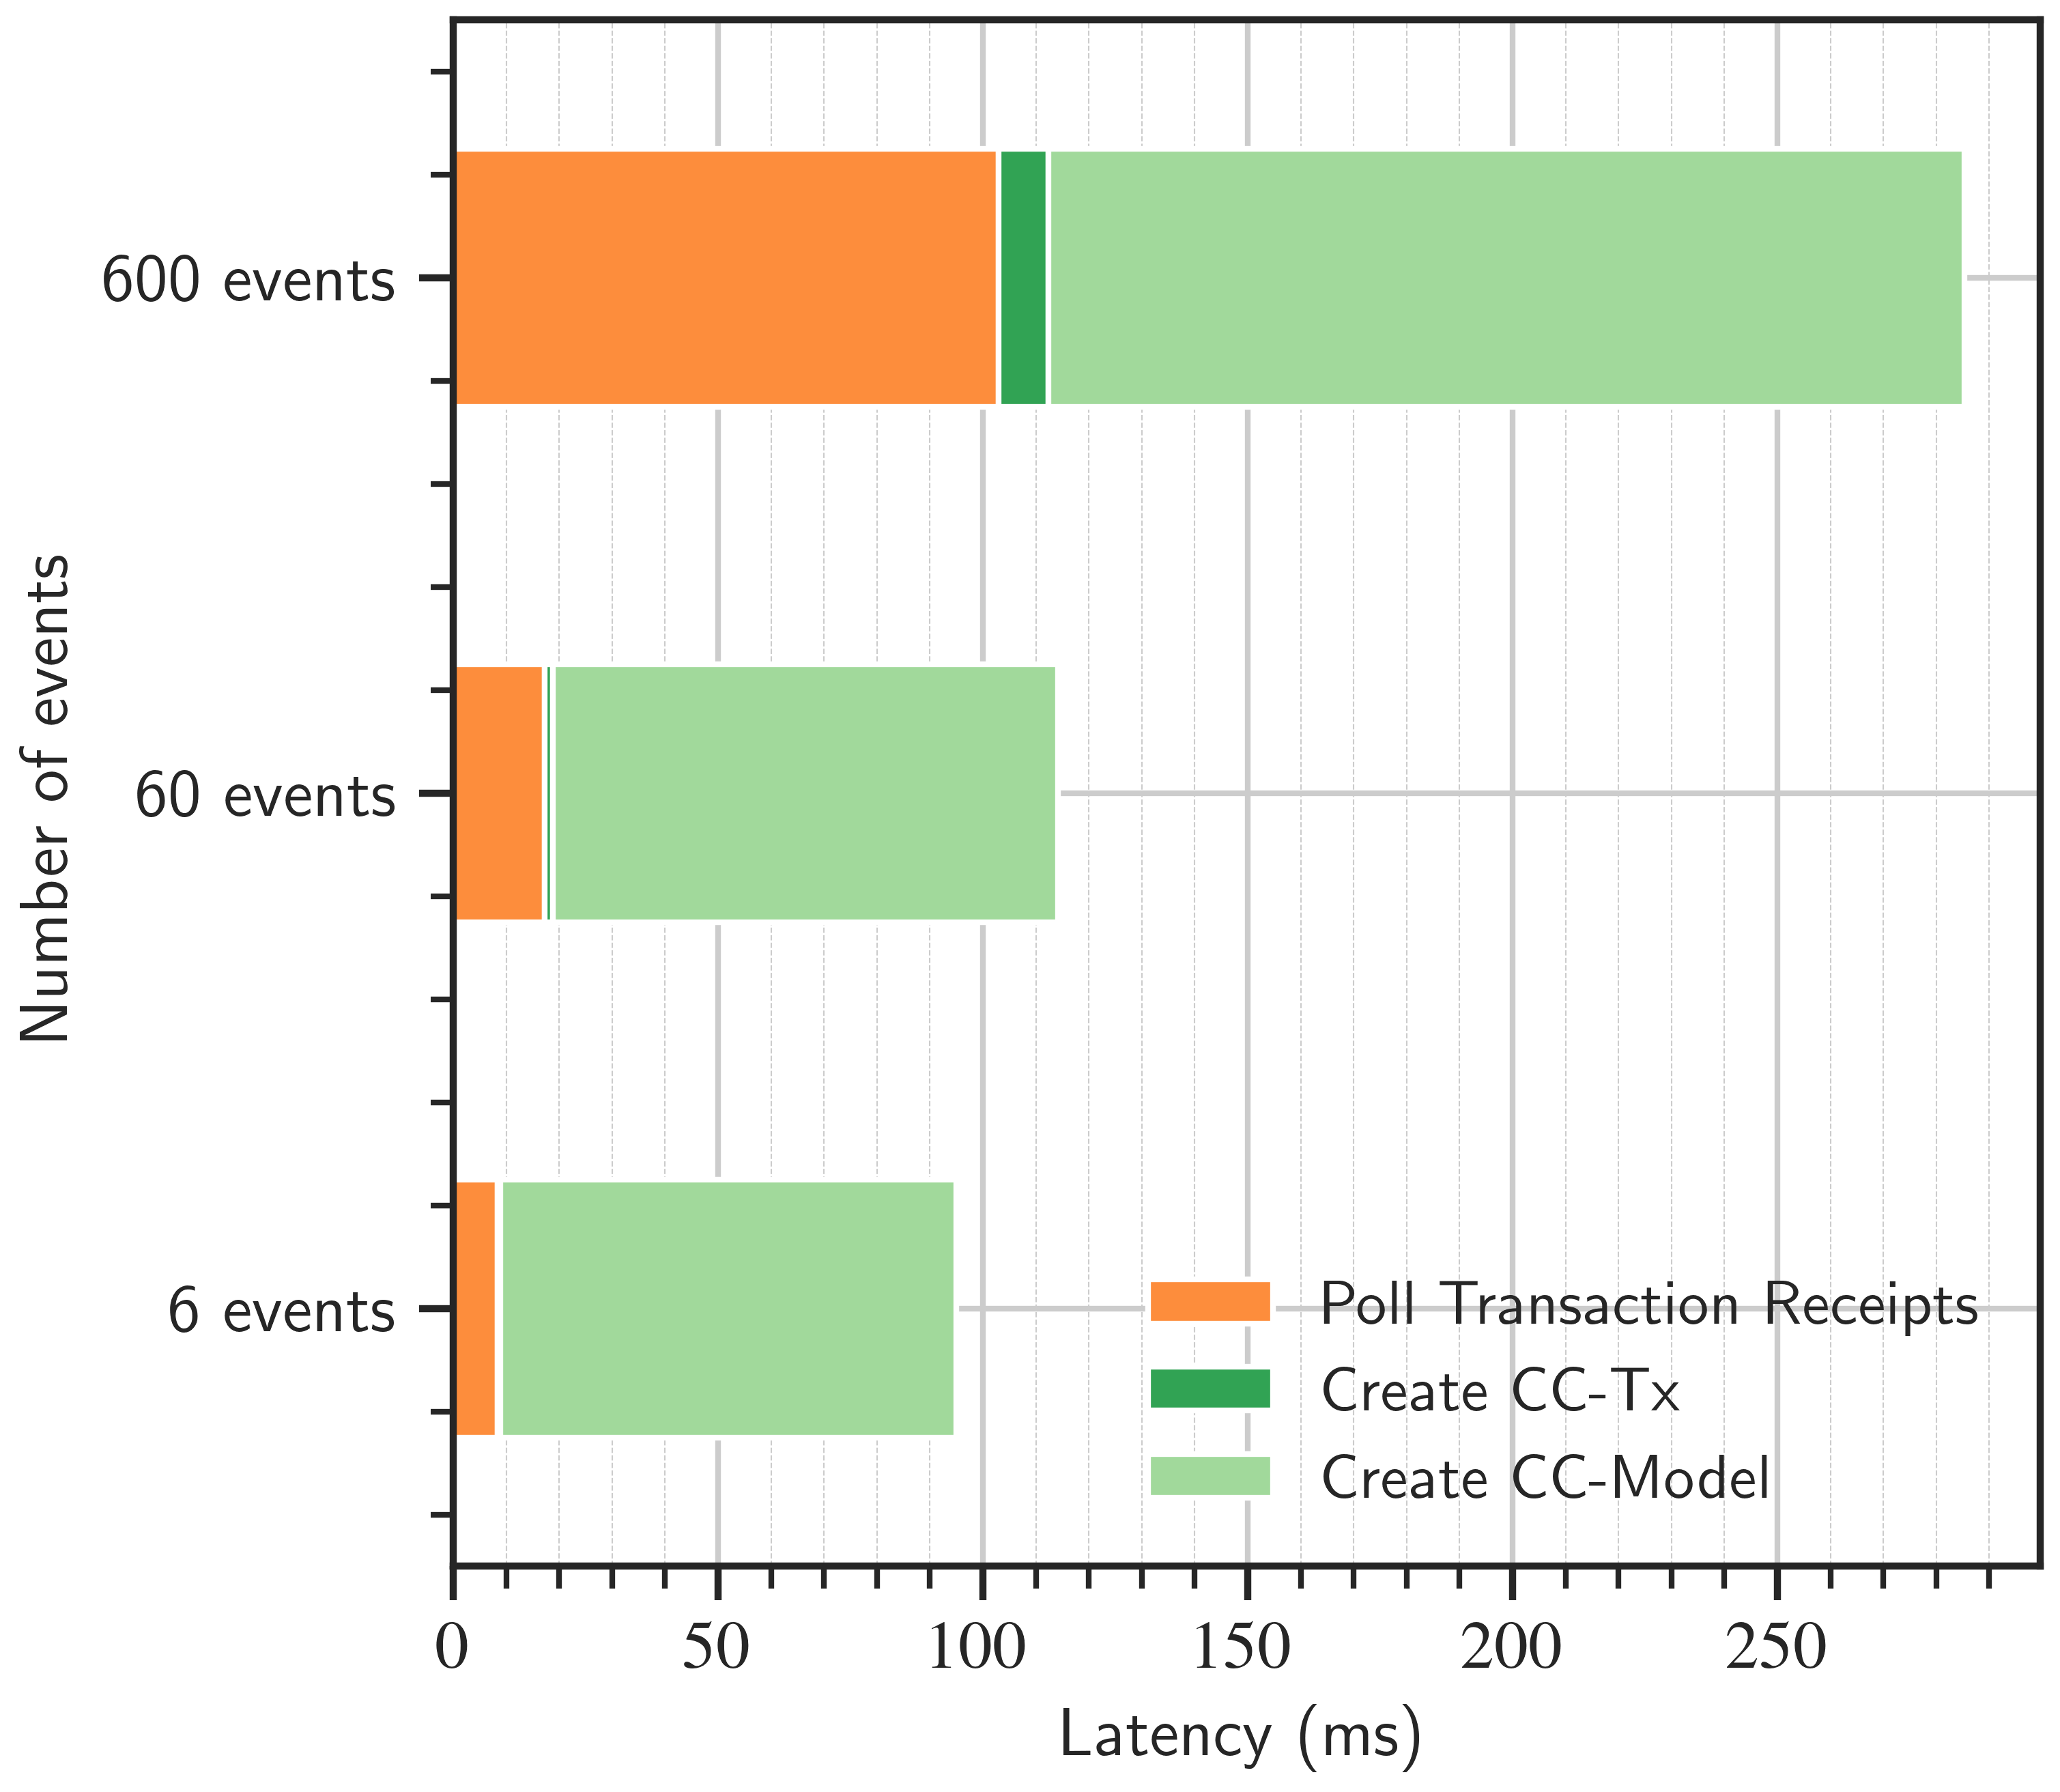

In [30]:
#creates horizontal bar plot for #events and latency

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
customScale = np.arange(0,300,50)
df = pd.DataFrame([
                  ['6 events', 
                reduced_metric_dict['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict['EVAL-ccModel-DUMMY']['mean']
                ], 

                  ['60 events', 
                reduced_metric_dict_60['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict_60['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict_60['EVAL-ccModel-DUMMY']['mean']
                ], 

                  ['600 events', 
                reduced_metric_dict_600['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict_600['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict_600['EVAL-ccModel-DUMMY']['mean']
                ]
                   
                   ],
                  columns=[
                        'events', 
                        mapper['EVAL-testFile-POLL'],
                        mapper['EVAL-testFile-AGGREGATE-CCTX'],
                        mapper['EVAL-ccModel-DUMMY']
                        ])
# view data
print(df)
  
textwidth = 3.31314
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
plt.rc('font', size=12) 

colors = plt.cm.get_cmap('tab20c')
cmap = ListedColormap([colors.colors[5],colors.colors[8],colors.colors[10]])

# plot data in stack manner of bar type
ax = df.plot(
      x='events', 
      xlabel="Number of events", 
      kind='barh', subplots=False, stacked=True, colormap=cmap,
      figsize= [5,5],
      grid= True,
      fontsize=12,
      xticks=customScale,
      ylabel="latency",
      title='')
ax.legend(fancybox=True, framealpha=1,loc= 'lower right')
ax.set_xlabel(xlabel='Latency (ms)')
#ax.legend(loc='lower right',facecolor="white")
ax.xaxis.grid(True, which='minor', linestyle='--', linewidth=0.25)

fig = ax.get_figure()

fig.savefig('../test-results/plots/use-case-baseline-all-events.pdf', dpi=300, bbox_inches='tight')
fig.savefig('../test-results/plots/use-case-baseline-all-events.png', dpi=300, bbox_inches='tight')

In [18]:
#%pip install seaborn
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

six_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict).transpose()
sixty_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict_60).transpose()
sixh_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict_600).transpose()


total_execution_time = six_events_dummy.loc[:,"mean"].sum()
total_execution_time_s = six_events_dummy.loc[:,"mean"].sum() / 1000
percentage_infra = six_events_dummy.loc['EVAL-testFile-SETUP-INFRA',"mean"] / total_execution_time
percentage_emit = six_events_dummy.loc['EVAL-testFile-SEND-MESSAGES',"mean"] / total_execution_time
both_percentage = percentage_infra + percentage_emit

print('Total execution time for six_events_dummy (ms): ', total_execution_time)
print('Total execution time for six_events_dummy (s): ', total_execution_time_s)
print('Percentage of phase Infra setup as total: ',  percentage_infra)
print('Percentage of phase Emit local tx as total: ',  percentage_emit)
print('Combined percentage:', both_percentage)

total_execution_time = sixty_events_dummy.loc[:,"mean"].sum()
total_execution_time_s = sixty_events_dummy.loc[:,"mean"].sum() / 1000
percentage_infra = sixty_events_dummy.loc['EVAL-testFile-SETUP-INFRA',"mean"] / total_execution_time
percentage_emit = sixty_events_dummy.loc['EVAL-testFile-SEND-MESSAGES',"mean"] / total_execution_time
both_percentage = percentage_infra + percentage_emit

print('Total execution time for sixty_events_dummy (ms): ', total_execution_time)
print('Total execution time for sixty_events_dummy (s): ', total_execution_time_s)
print('Percentage of phase Infra setup as total: ',  percentage_infra)
print('Percentage of phase Emit local tx as total: ',  percentage_emit)
print('Combined percentage:', both_percentage)


total_execution_time = sixh_events_dummy.loc[:,"mean"].sum()
total_execution_time_s = sixh_events_dummy.loc[:,"mean"].sum() / 1000
percentage_infra = sixh_events_dummy.loc['EVAL-testFile-SETUP-INFRA',"mean"] / total_execution_time
percentage_emit = sixh_events_dummy.loc['EVAL-testFile-SEND-MESSAGES',"mean"] / total_execution_time
both_percentage = percentage_infra + percentage_emit

print('Total execution time for sixh_events_dummy (ms): ', total_execution_time)
print('Total execution time for sixh_events_dummy (s): ', total_execution_time_s)
print('Percentage of phase Infra setup as total: ',  percentage_infra)
print('Percentage of phase Emit local tx as total: ',  percentage_emit)
print('Combined percentage:', both_percentage)



#sns.catplot(x="mean", y="label", kind="bar", data=sixty_events_dummy)


Total execution time for six_events_dummy (ms):  151377.65999999997
Total execution time for six_events_dummy (s):  151.37765999999996
Percentage of phase Infra setup as total:  0.894307852294718
Percentage of phase Emit local tx as total:  0.07464773864254476
Combined percentage: 0.9689555909372627
Total execution time for sixty_events_dummy (ms):  237804.23000000004
Total execution time for sixty_events_dummy (s):  237.80423000000005
Percentage of phase Infra setup as total:  0.5624913820918995
Percentage of phase Emit local tx as total:  0.4178315078751963
Combined percentage: 0.9803228899670958
Total execution time for sixh_events_dummy (ms):  1115611.3800000001
Total execution time for sixh_events_dummy (s):  1115.61138
Percentage of phase Infra setup as total:  0.12023825895357934
Percentage of phase Emit local tx as total:  0.8754394115269781
Combined percentage: 0.9956776704805574
